In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv(r'C:/Users/dyalcin/Desktop/Eğitim/İstatistik/archive/used_cars_data.csv')


print(df.head())

C:\Users\dyalcin\AppData\Local\Temp\ipykernel_11404\4292392471.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(r'C:/Users/dyalcin/Desktop/Eğitim/İstatistik/archive/used_cars_data.csv')


                 vin back_legroom  bed bed_height bed_length        body_type  \
0  ZACNJABB5KPJ92081      35.1 in  NaN        NaN        NaN  SUV / Crossover   
1  SALCJ2FX1LH858117      38.1 in  NaN        NaN        NaN  SUV / Crossover   
2  JF1VA2M67G9829723      35.4 in  NaN        NaN        NaN            Sedan   
3  SALRR2RV0L2433391      37.6 in  NaN        NaN        NaN  SUV / Crossover   
4  SALCJ2FXXLH862327      38.1 in  NaN        NaN        NaN  SUV / Crossover   

  cabin      city  city_fuel_economy  combine_fuel_economy  ...  transmission  \
0   NaN   Bayamon                NaN                   NaN  ...             A   
1   NaN  San Juan                NaN                   NaN  ...             A   
2   NaN  Guaynabo               17.0                   NaN  ...             M   
3   NaN  San Juan                NaN                   NaN  ...             A   
4   NaN  San Juan                NaN                   NaN  ...             A   

          transmission_dis

In [3]:
#kullanılacak sutünların filtrelenmesi 
df_filtered = df[[
    'make_name',
    'model_name',
    'year',
    'mileage',
    'price',
    'city',
    'engine_cylinders',
    'combine_fuel_economy',
    'has_accidents',
    'horsepower',
    'power',
    'maximum_seating',
    'owner_count',
    'savings_amount',
    'seller_rating',
    'daysonmarket',
    'torque'



]]

In [4]:
#corelasyonda kullanılacak sayısal verilerin filtrelenemsi
columns_to_use = [
    'engine_cylinders',
    'has_accidents',
    'horsepower',
    'power',
    'maximum_seating',
    'owner_count',
    'savings_amount',
    'seller_rating',
    'daysonmarket',
    'torque',
    'year',
    'mileage',
    'price'
]

df_cor = df_filtered[columns_to_use]

In [6]:


# Bu sütunlarda NaN içeren satırları filtrele
missing_rows = df_cor[df_cor.isnull().any(axis=1)]

# Sonuçları göster
print(missing_rows)
print(df_cor.isnull().sum())


        engine_cylinders has_accidents  horsepower               power  \
0                     I4           NaN       177.0  177 hp @ 5,750 RPM   
1                     I4           NaN       246.0  246 hp @ 5,500 RPM   
2                     H4         False       305.0  305 hp @ 6,000 RPM   
3                     V6           NaN       340.0  340 hp @ 6,500 RPM   
4                     I4           NaN       246.0  246 hp @ 5,500 RPM   
...                  ...           ...         ...                 ...   
3000032               I4           NaN       131.0  131 hp @ 5,600 RPM   
3000033        I4 Hybrid         False       110.0  110 hp @ 5,000 RPM   
3000035               I4         False       170.0                 NaN   
3000036               V6           NaN       310.0  310 hp @ 6,800 RPM   
3000037              NaN          True       240.0  240 hp @ 5,500 RPM   

        maximum_seating  owner_count  savings_amount  seller_rating  \
0               5 seats          NaN    

In [7]:
# NaN içeren satırları kaldır
df_cor = df_cor.dropna()

# Sonuçları göster (opsiyonel)
print(df_cor)

        engine_cylinders has_accidents  horsepower               power  \
36                    I4         False       201.0  201 hp @ 6,000 RPM   
38                    I4         False       160.0  160 hp @ 5,700 RPM   
40                    V6         False       311.0  311 hp @ 6,600 RPM   
41                    V6         False       310.0  310 hp @ 6,800 RPM   
45                    V6          True       281.0  281 hp @ 6,300 RPM   
...                  ...           ...         ...                 ...   
3000028               H4         False       170.0  170 hp @ 5,800 RPM   
3000031               I4         False       179.0  179 hp @ 6,000 RPM   
3000034               V6         False       278.0  278 hp @ 6,000 RPM   
3000038        I4 Diesel         False       180.0  180 hp @ 4,000 RPM   
3000039               I4         False       170.0  170 hp @ 6,000 RPM   

        maximum_seating  owner_count  savings_amount  seller_rating  \
36              5 seats          1.0    

In [8]:
# "seats" kelimesini kaldır, boşlukları temizle ve sayıya çevir
df_cor['maximum_seating'] = df_cor['maximum_seating'].str.replace('seats', '', case=False, regex=False)
df_cor['maximum_seating'] = df_cor['maximum_seating'].str.strip()
df_cor['maximum_seating'] = pd.to_numeric(df_cor['maximum_seating'], errors='coerce')

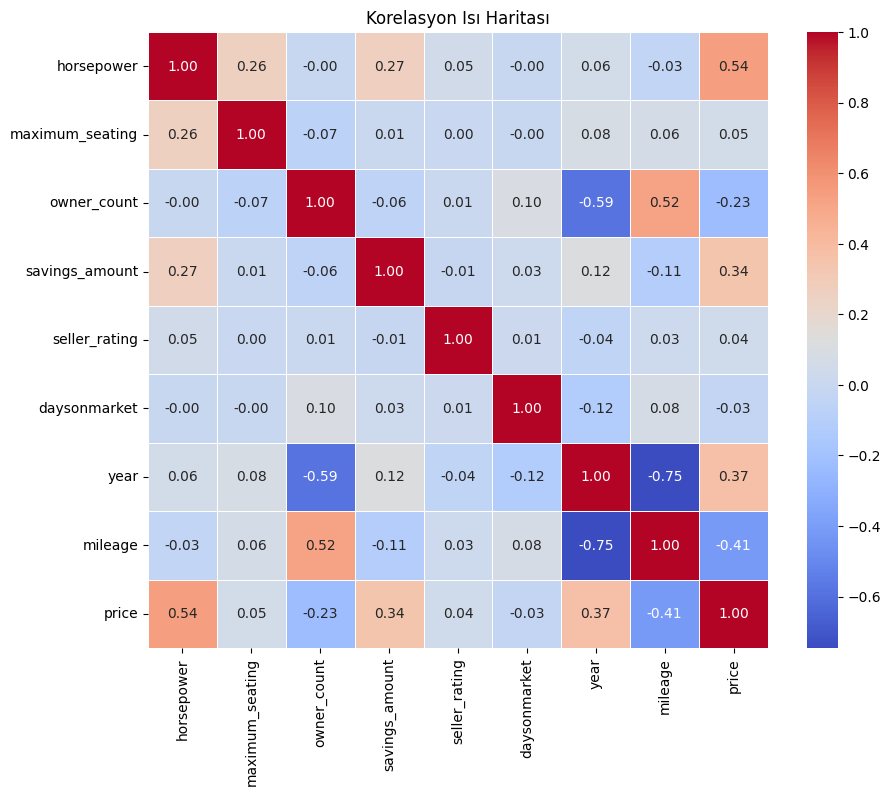

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sayısal sütunların korelasyon matrisini al
corr_matrix = df_cor.corr(numeric_only=True)

# Grafik boyutu
plt.figure(figsize=(10, 8))

# Isı haritasını çiz
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Başlık ekle
plt.title("Korelasyon Isı Haritası")
plt.show()


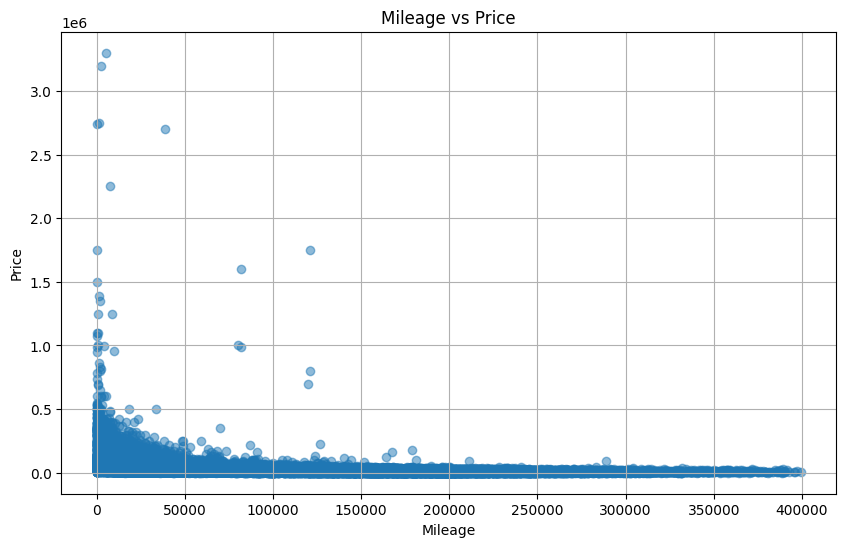

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df_cor['mileage'], df_cor['price'], alpha=0.5)
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)
plt.show()


C:\Users\dyalcin\AppData\Local\Temp\ipykernel_11404\2862619485.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_filtered['daysonmarket'].dropna(), shade=True)


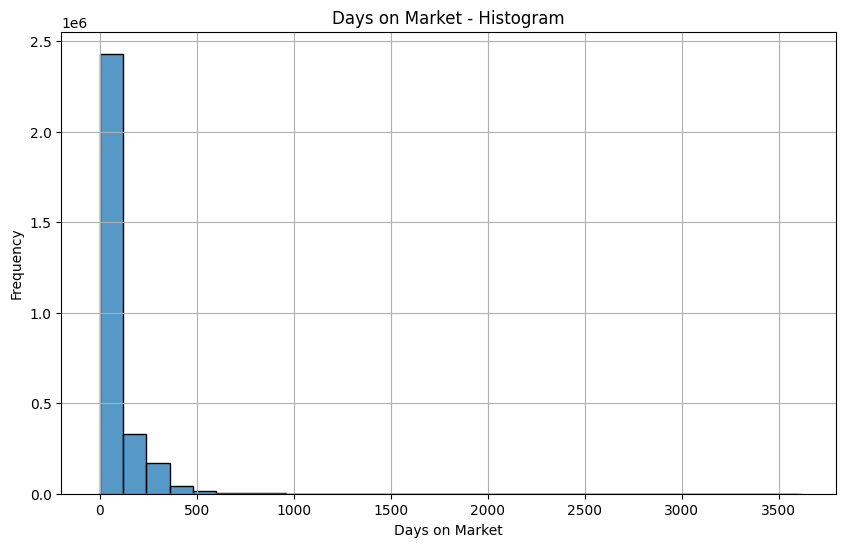

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['daysonmarket'].dropna(), bins=30, kde=False)
plt.title('Days on Market - Histogram')
plt.xlabel('Days on Market')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


C:\Users\dyalcin\AppData\Local\Temp\ipykernel_11404\405228618.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_filtered['daysonmarket'].dropna(), shade=True)


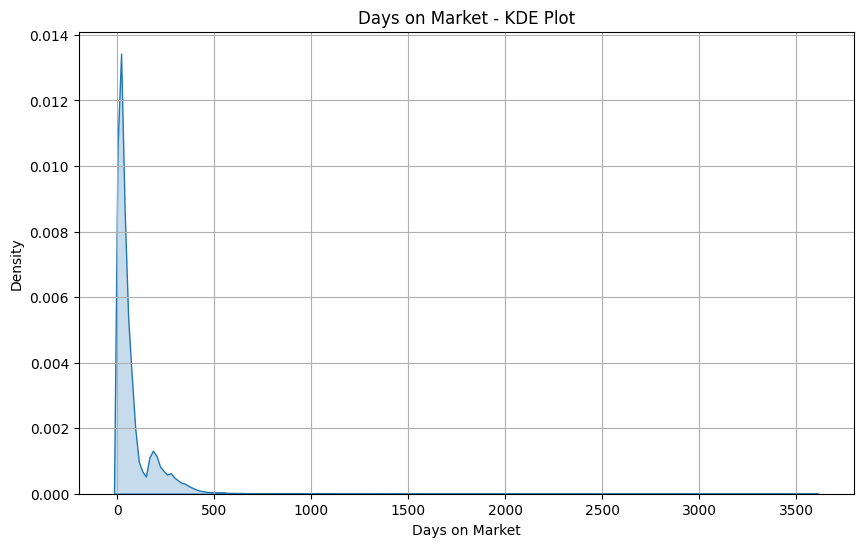

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_filtered['daysonmarket'].dropna(), shade=True)
plt.title('Days on Market - KDE Plot')
plt.xlabel('Days on Market')
plt.ylabel('Density')
plt.grid(True)
plt.show()


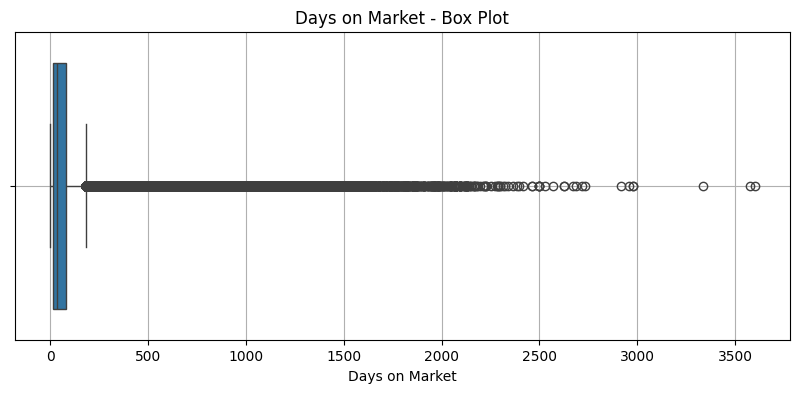

In [14]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['daysonmarket'].dropna())
plt.title('Days on Market - Box Plot')
plt.xlabel('Days on Market')
plt.grid(True)
plt.show()


In [16]:
# 1. Gerekli kütüphaneler
import pandas as pd

# 2. IQR hesapla
Q1 = df_filtered['daysonmarket'].quantile(0.25)
Q3 = df_filtered['daysonmarket'].quantile(0.75)
IQR = Q3 - Q1

# 3. Alt ve üst sınırları belirle
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 4. Aykırı olmayanları filtrele
df_filtered_clean = df_filtered[(df_filtered['daysonmarket'] >= lower_bound) & (df_filtered['daysonmarket'] <= upper_bound)]

# 5. Sonuç
print(f"Temizlenmeden önce satır sayısı: {len(df_filtered)}")
print(f"Temizlendikten sonra satır sayısı: {len(df_filtered_clean)}")


Temizlenmeden önce satır sayısı: 3000040
Temizlendikten sonra satır sayısı: 2596154


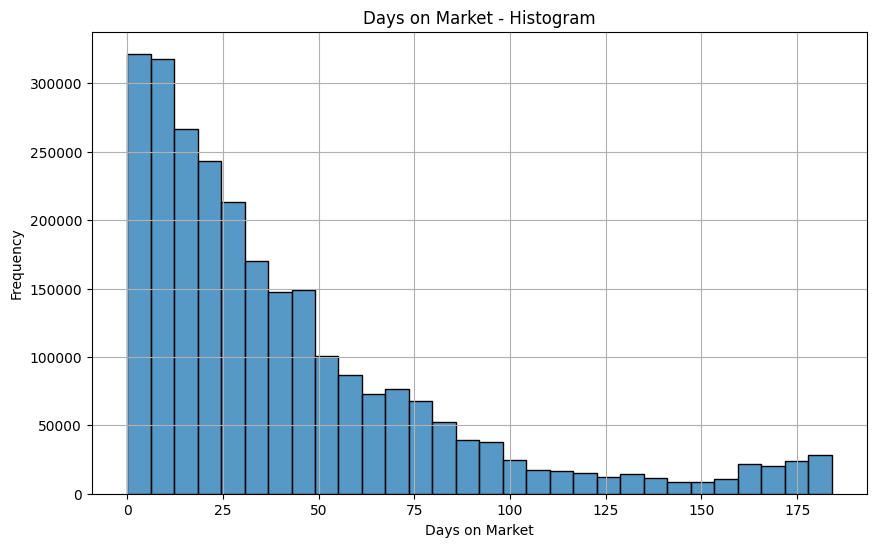

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_clean['daysonmarket'].dropna(), bins=30, kde=False)
plt.title('Days on Market - Histogram')
plt.xlabel('Days on Market')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

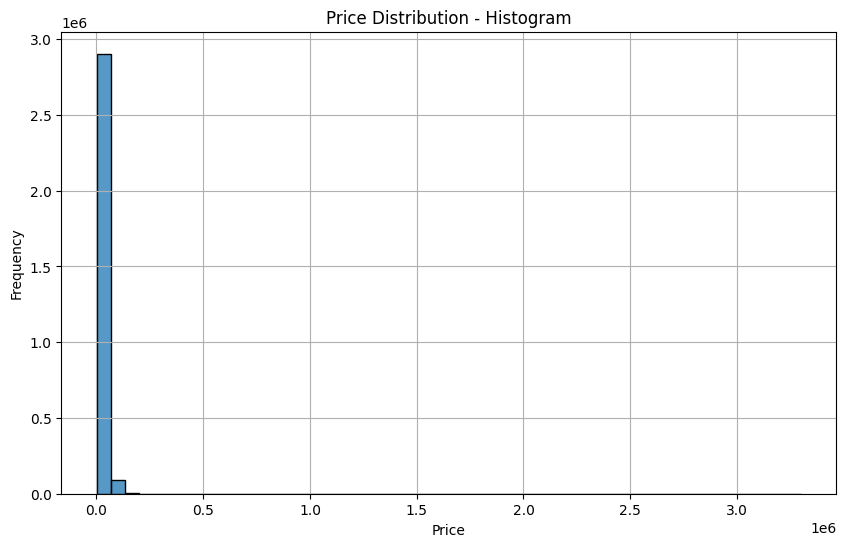

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['price'].dropna(), bins=50, kde=False)
plt.title('Price Distribution - Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


C:\Users\dyalcin\AppData\Local\Temp\ipykernel_11404\3889183190.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_filtered['price'].dropna(), shade=True)


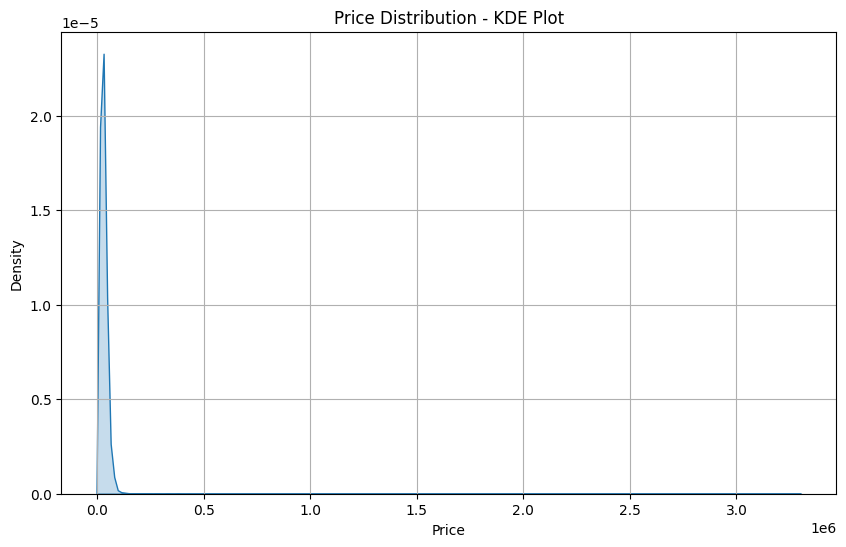

In [19]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_filtered['price'].dropna(), shade=True)
plt.title('Price Distribution - KDE Plot')
plt.xlabel('Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()


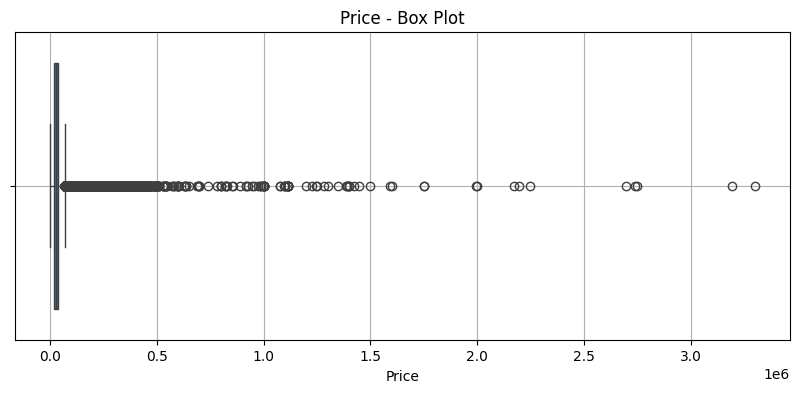

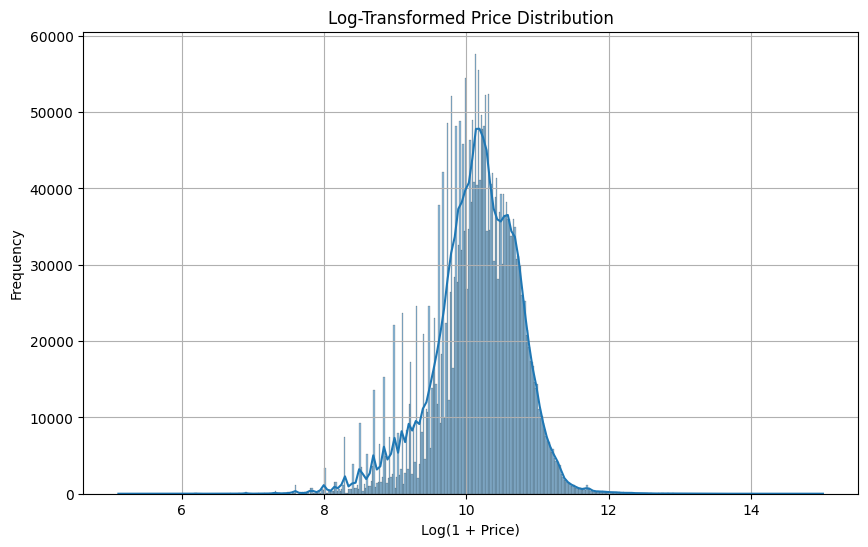

In [73]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtered['price'].dropna())
plt.title('Price - Box Plot')
plt.xlabel('Price')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df_filtered['price'].dropna()), bins=50, kde=True)
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(1 + Price)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [23]:
# 1. IQR hesapla (price için)
Q1 = df_filtered_clean['price'].quantile(0.25)
Q3 = df_filtered_clean['price'].quantile(0.75)
IQR = Q3 - Q1

# 2. Alt ve üst sınırlar
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Aykırı olmayanları filtrele
df_filtered_clean = df_filtered_clean[(df_filtered_clean['price'] >= lower_bound) & (df_filtered_clean['price'] <= upper_bound)]

# 4. Bilgi mesajı
print(f"price aykırı değerleri temizlendikten sonra satır sayısı: {len(df_filtered_clean)}")


price aykırı değerleri temizlendikten sonra satır sayısı: 2511993


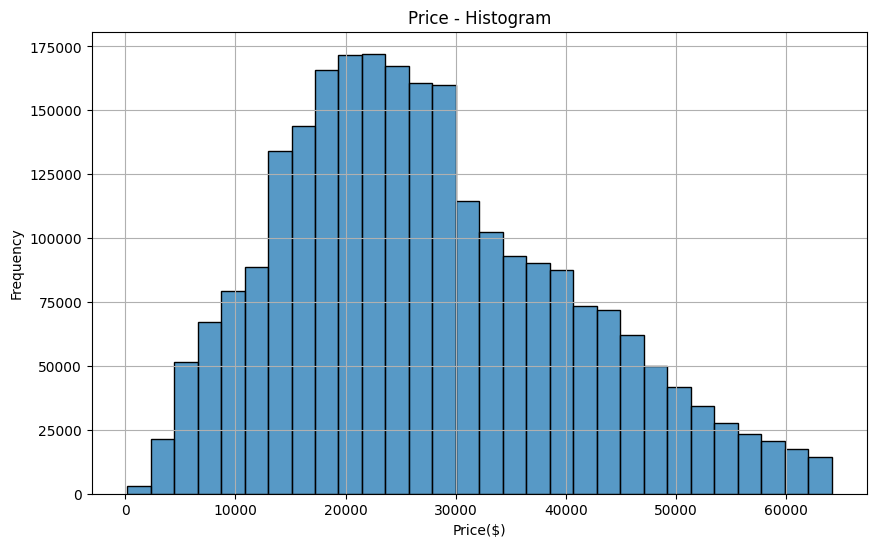

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_clean['price'].dropna(), bins=30, kde=False)
plt.title('Price - Histogram')
plt.xlabel('Price($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [29]:
correlation = df_filtered_clean[['price', 'year', 'mileage']].corr()
print(correlation)


            price      year   mileage
price    1.000000  0.537410 -0.588657
year     0.537410  1.000000 -0.799152
mileage -0.588657 -0.799152  1.000000


In [30]:
print(df_filtered_clean[['price', 'year', 'mileage']].var())


price      1.727528e+08
year       1.587205e+01
mileage    2.120021e+09
dtype: float64


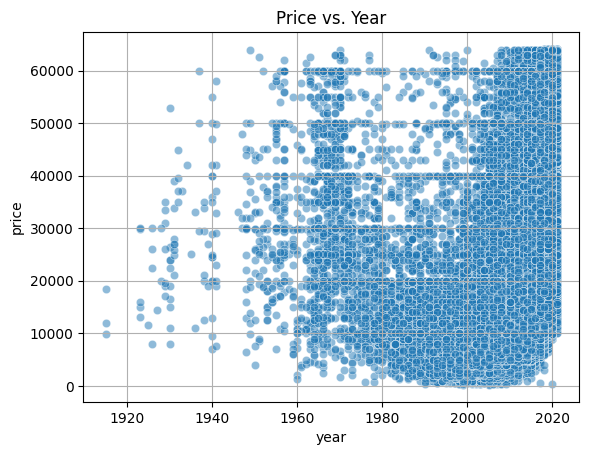

In [31]:
sns.scatterplot(data=df_filtered_clean, x='year', y='price', alpha=0.5)
plt.title('Price vs. Year')
plt.grid(True)
plt.show()


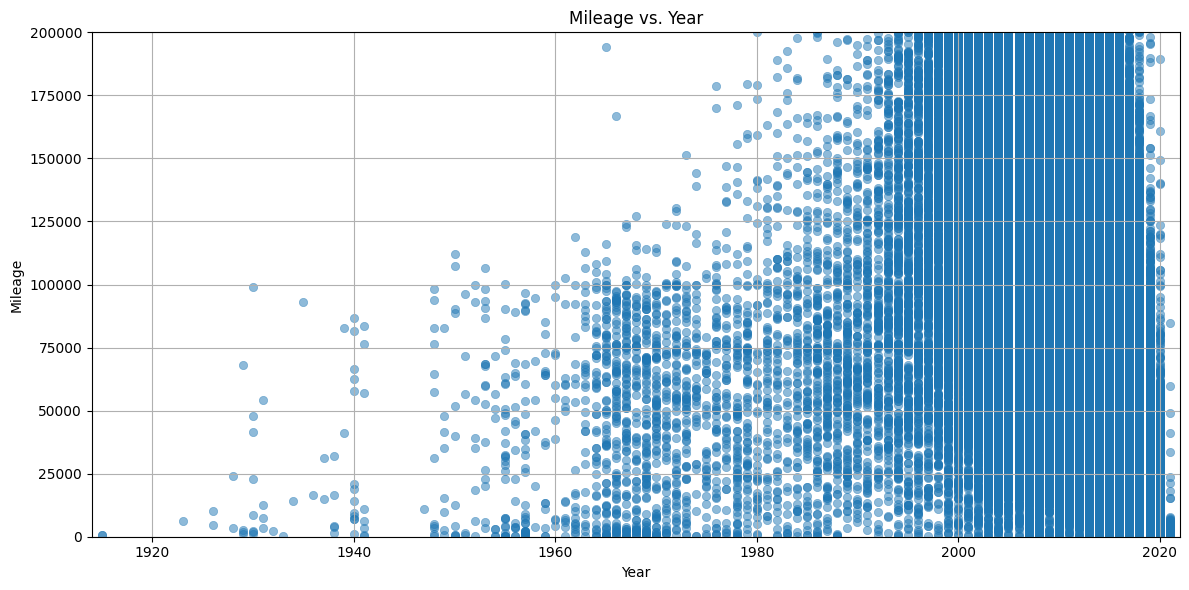

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df_filtered_clean,
    x='year',
    y='mileage',
    alpha=0.5,
    edgecolor=None
)

# Ölçekleri daha yakınlaştırmak için sınır koyabiliriz:
plt.ylim(0, 200_000)   # sadece 0–200,000 km arası göster
plt.xlim(df_filtered_clean['year'].min() - 1, df_filtered_clean['year'].max() + 1)

plt.title('Mileage vs. Year')
plt.xlabel('Year')
plt.ylabel('Mileage')
plt.grid(True)
plt.tight_layout()
plt.show()


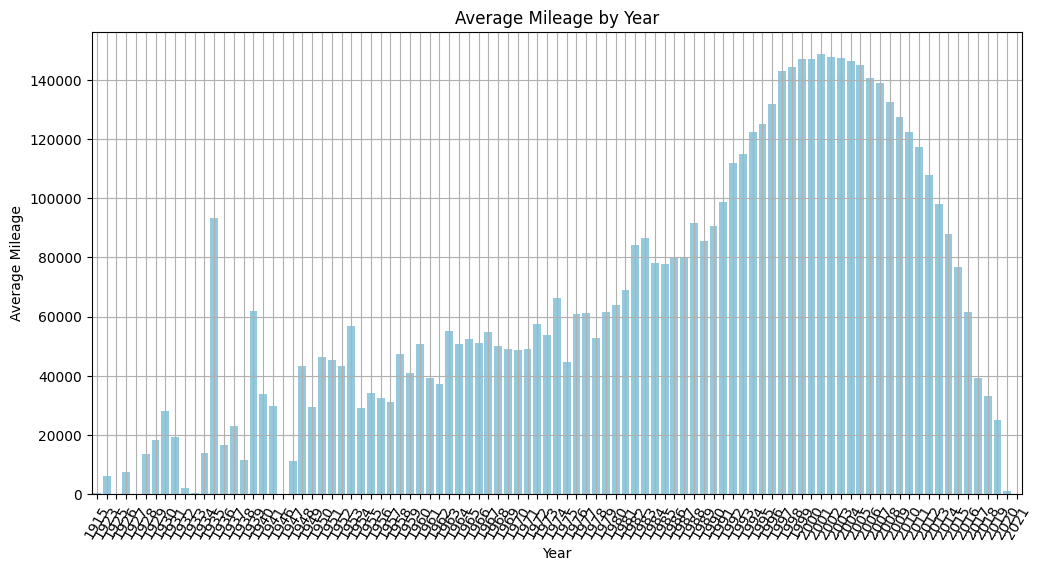

In [38]:
# Yıla göre ortalama mileage hesapla
yearly_avg_mileage = df_filtered_clean.groupby('year')['mileage'].mean().reset_index()

# Bar plot çiz
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_avg_mileage, x='year', y='mileage', color='skyblue')

plt.title('Average Mileage by Year')
plt.xlabel('Year')
plt.ylabel('Average Mileage')
plt.grid(True)
plt.xticks(rotation=60)
plt.show()


In [39]:
# IQR hesapla
Q1 = df_filtered_clean['mileage'].quantile(0.25)
Q3 = df_filtered_clean['mileage'].quantile(0.75)
IQR = Q3 - Q1

# Alt ve üst sınırları belirle
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerleri çıkar
df_no_outliers = df_filtered_clean[(df_filtered_clean['mileage'] >= lower_bound) &
                                   (df_filtered_clean['mileage'] <= upper_bound)]


<Figure size 640x480 with 0 Axes>

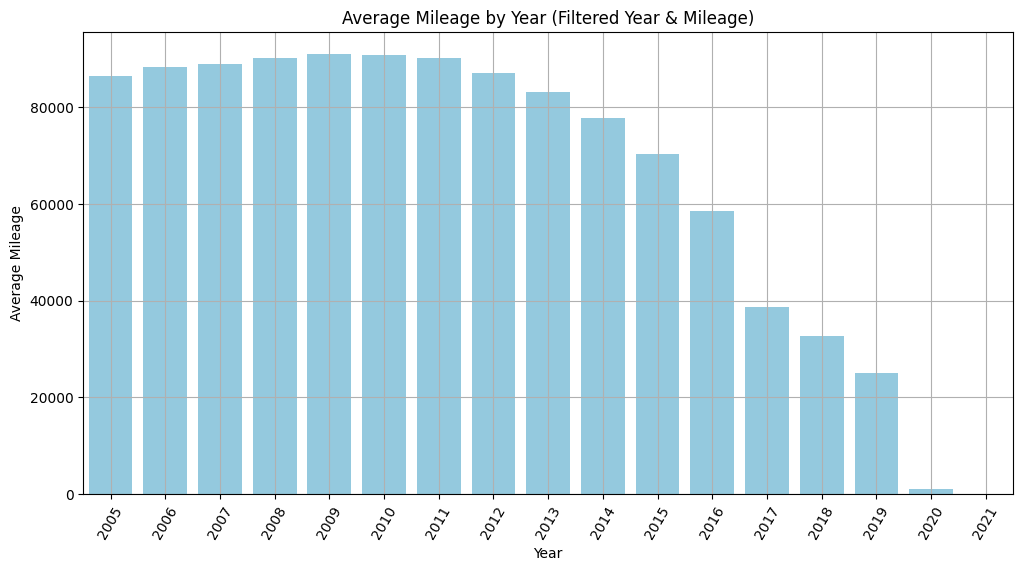

In [79]:
plt.clf()  # önce temizle
# 2. Year filtrele
df_no_outliers = df_no_outliers[(df_no_outliers['year'] >= 1995) & (df_no_outliers['year'] <= 2025)]

# 3. Yıla göre ortalama mileage
yearly_avg_mileage = df_no_outliers.groupby('year')['mileage'].mean().reset_index()


# 4. Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_avg_mileage, x='year', y='mileage', color='skyblue')
plt.title('Average Mileage by Year (Filtered Year & Mileage)')
plt.xlabel('Year')
plt.ylabel('Average Mileage')
plt.xticks(rotation=60)
plt.grid(True)


plt.show()

C:\Users\dyalcin\AppData\Local\Temp\ipykernel_11404\1901399988.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg_price.index, y=city_avg_price.values, palette='coolwarm')


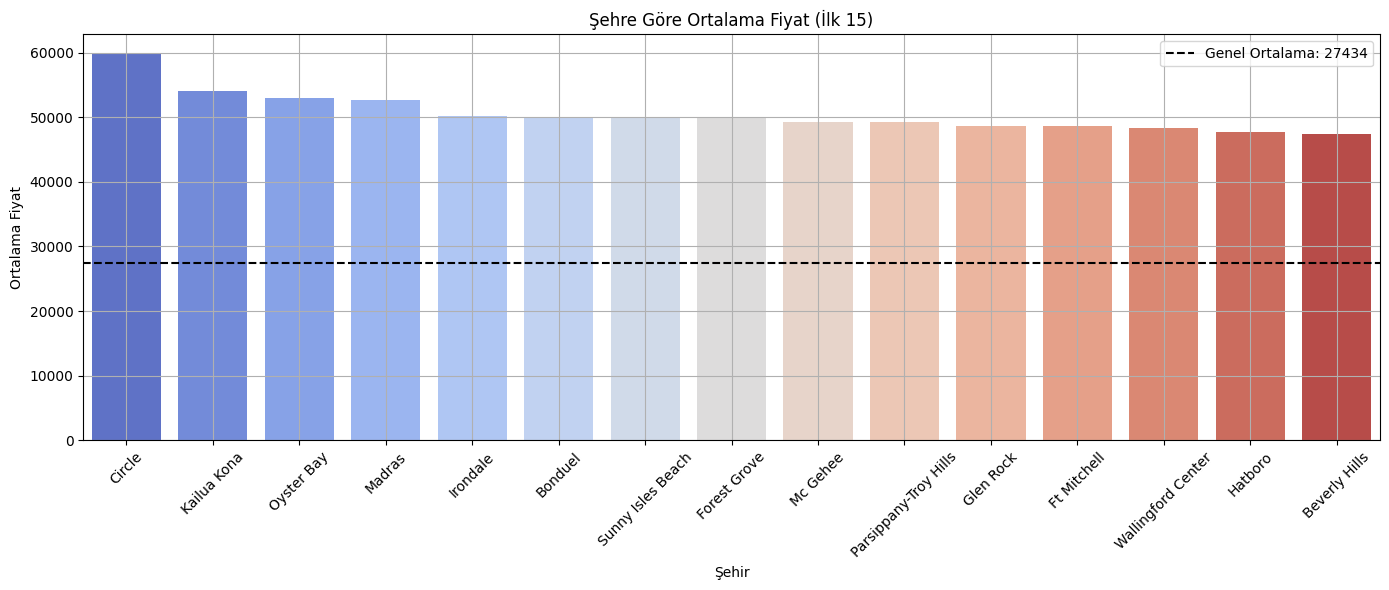

In [41]:
# Şehir bazlı ortalama fiyat
city_avg_price = df_filtered_clean.groupby('city')['price'].mean().sort_values(ascending=False).head(15)  # en pahalı 15 şehir

# Bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x=city_avg_price.index, y=city_avg_price.values, palette='coolwarm')

# Ortalama fiyat çizgisi
overall_avg = df_filtered_clean['price'].mean()
plt.axhline(overall_avg, color='black', linestyle='--', label=f'Genel Ortalama: {int(overall_avg)}')

plt.title('Şehre Göre Ortalama Fiyat (İlk 15)')
plt.ylabel('Ortalama Fiyat')
plt.xlabel('Şehir')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\dyalcin\AppData\Local\Temp\ipykernel_11404\2316618271.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_avg_price.index, y=model_avg_price.values, palette='crest')


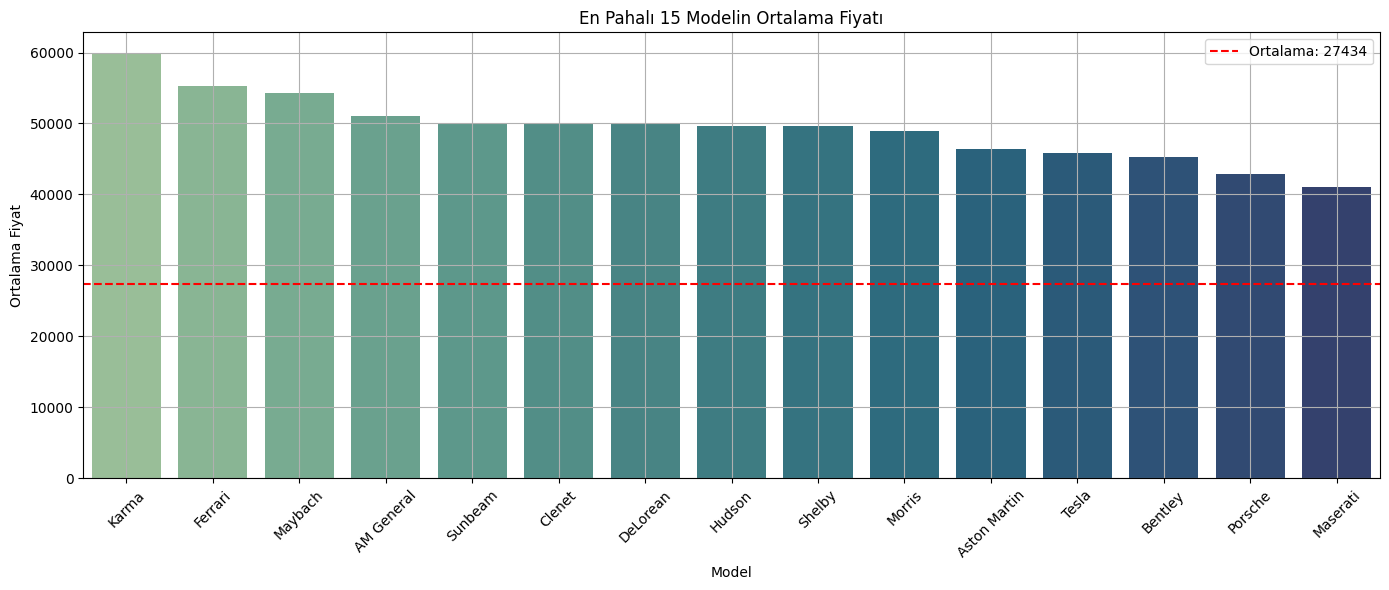

In [42]:
# Modele göre ortalama fiyat
model_avg_price = df_filtered_clean.groupby('make_name')['price'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 6))
sns.barplot(x=model_avg_price.index, y=model_avg_price.values, palette='crest')

# Ortalama fiyat çizgisi
overall_avg = df_filtered_clean['price'].mean()
plt.axhline(overall_avg, color='red', linestyle='--', label=f'Ortalama: {int(overall_avg)}')

plt.title('En Pahalı 15 Modelin Ortalama Fiyatı')
plt.ylabel('Ortalama Fiyat')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
# Yıla göre ortalama fiyat
yearly_avg_price = df_filtered_clean.groupby('year')['price'].mean().reset_index()


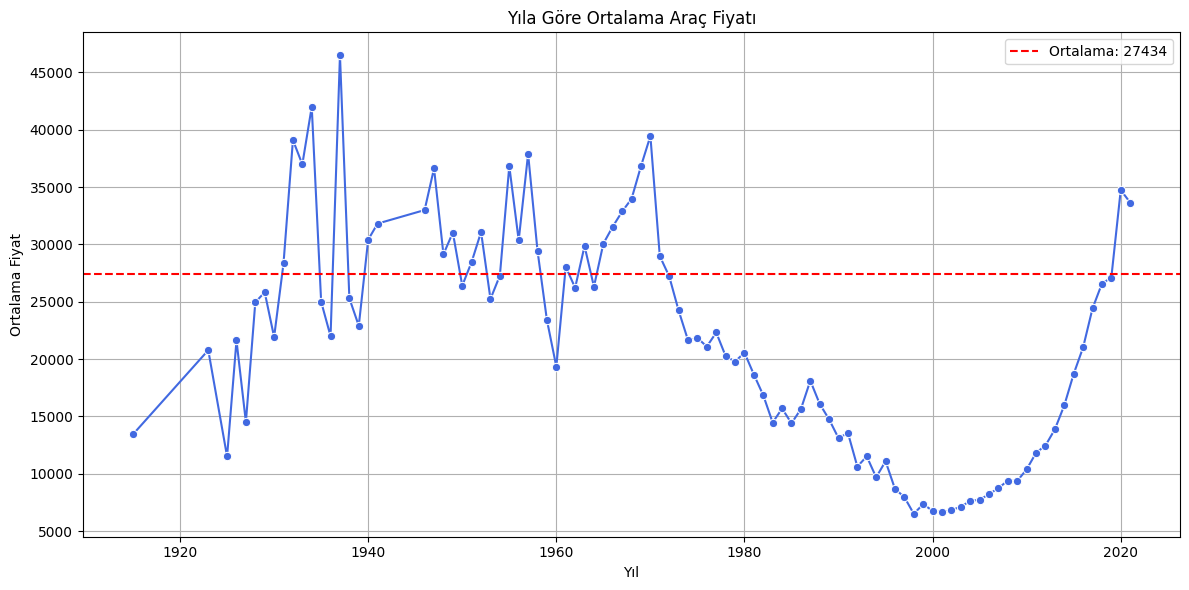

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg_price, x='year', y='price', marker='o', color='royalblue')

# Ortalama çizgisi
overall_avg = df_filtered_clean['price'].mean()
plt.axhline(overall_avg, color='red', linestyle='--', label=f'Ortalama: {int(overall_avg)}')

plt.title('Yıla Göre Ortalama Araç Fiyatı')
plt.xlabel('Yıl')
plt.ylabel('Ortalama Fiyat')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [47]:
# Yıl ve model bazlı ortalama fiyat
year_model_avg = df_filtered_clean.groupby(['year', 'model_name'])['price'].mean().reset_index()
# En çok geçen modelleri bul (ilk 5 model)
top_models = df_filtered_clean['model_name'].value_counts().head(5).index.tolist()

# Bu modelleri filtrele
filtered_data = year_model_avg[year_model_avg['model_name'].isin(top_models)]



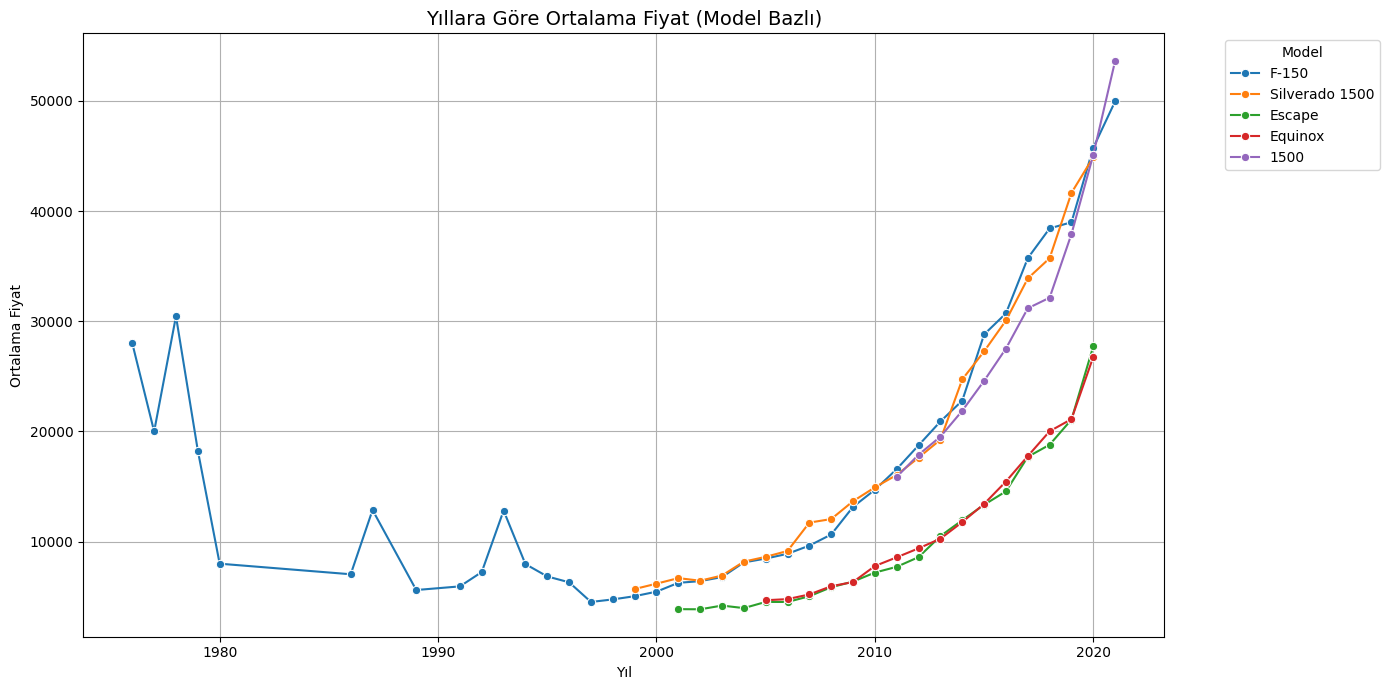

In [49]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=filtered_data, x='year', y='price', hue='model_name', marker='o')

plt.title('Yıllara Göre Ortalama Fiyat (Model Bazlı)', fontsize=14)
plt.xlabel('Yıl')
plt.ylabel('Ortalama Fiyat')
plt.grid(True)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [51]:
# make, model, year bazlı gruplama
grouped = df_filtered_clean.groupby(['make_name', 'model_name', 'year']).agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    price_std=('price', 'std'),
    count=('price', 'count')
).reset_index()


C:\Users\dyalcin\AppData\Local\Temp\ipykernel_11404\1582244039.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_median_price.index, y=city_median_price.values, palette='coolwarm')


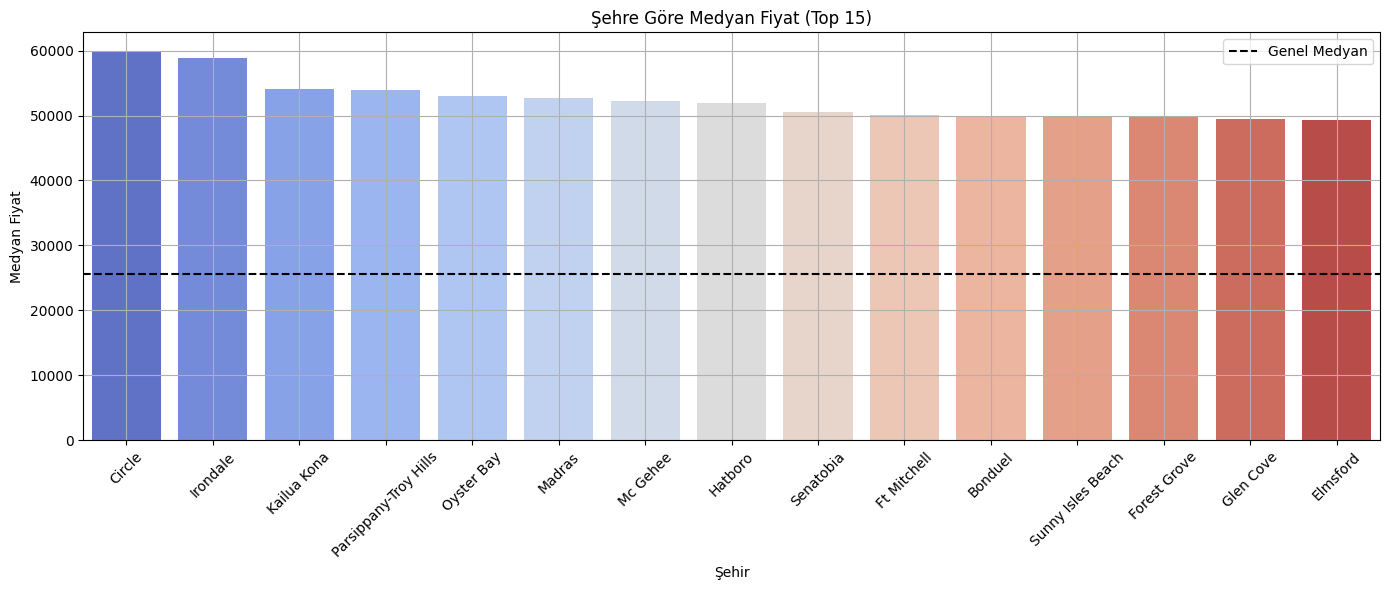

In [55]:
city_median_price = df_filtered_clean.groupby('city')['price'].median().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 6))
sns.barplot(x=city_median_price.index, y=city_median_price.values, palette='coolwarm')

plt.axhline(df_filtered_clean['price'].median(), color='black', linestyle='--', label='Genel Medyan')

plt.title('Şehre Göre Medyan Fiyat (Top 15)')
plt.ylabel('Medyan Fiyat')
plt.xlabel('Şehir')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


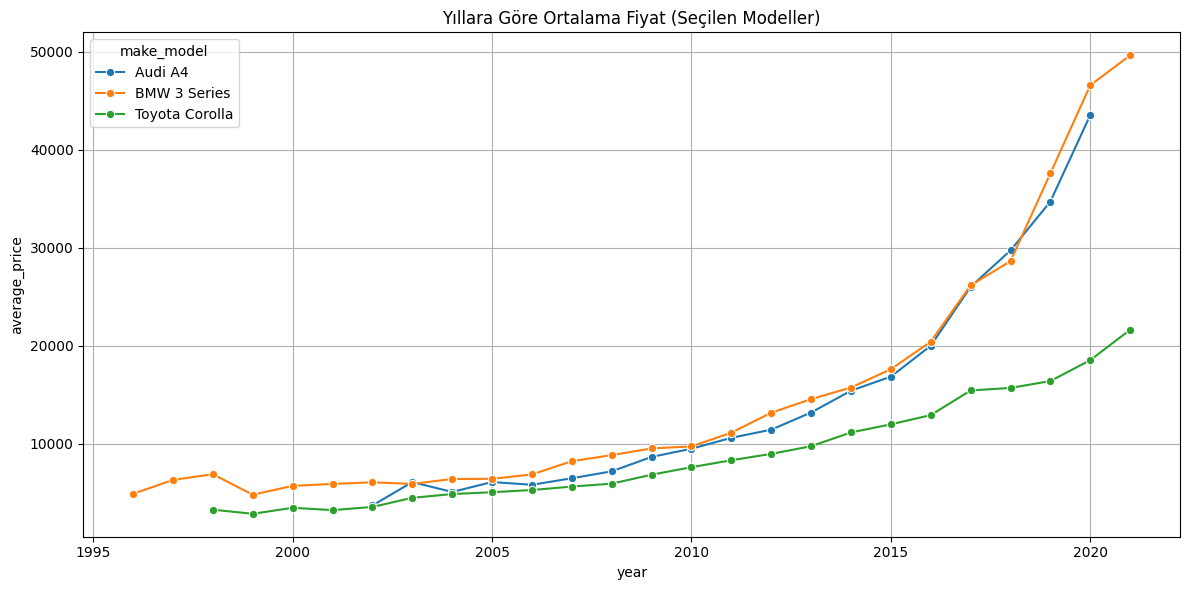

In [ ]:
# Örnek modeller: sadece birkaç tanesini görselleştirelim
selected_models = ['BMW 3 Series', 'Audi A4', 'Toyota Corolla']

filtered_plot_data = grouped_filtered[grouped_filtered['make_model'].isin(selected_models)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_plot_data, x='year', y='average_price', hue='make_model', marker='o')

plt.title('Yıllara Göre Ortalama Fiyat (Seçilen Modeller)')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\dyalcin\AppData\Local\Temp\ipykernel_11404\2232040388.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_median_price.index, y=model_median_price.values, palette='crest')


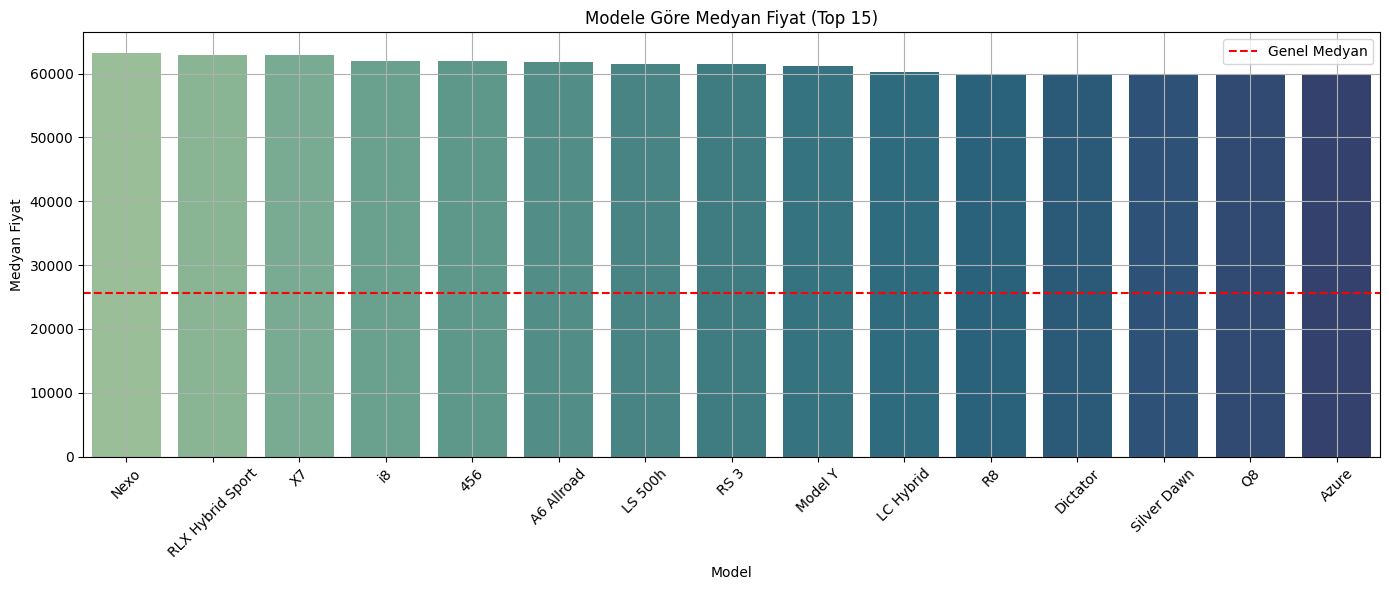

In [57]:
model_median_price = df_filtered_clean.groupby('model_name')['price'].median().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 6))
sns.barplot(x=model_median_price.index, y=model_median_price.values, palette='crest')

plt.axhline(df_filtered_clean['price'].median(), color='red', linestyle='--', label='Genel Medyan')

plt.title('Modele Göre Medyan Fiyat (Top 15)')
plt.ylabel('Medyan Fiyat')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


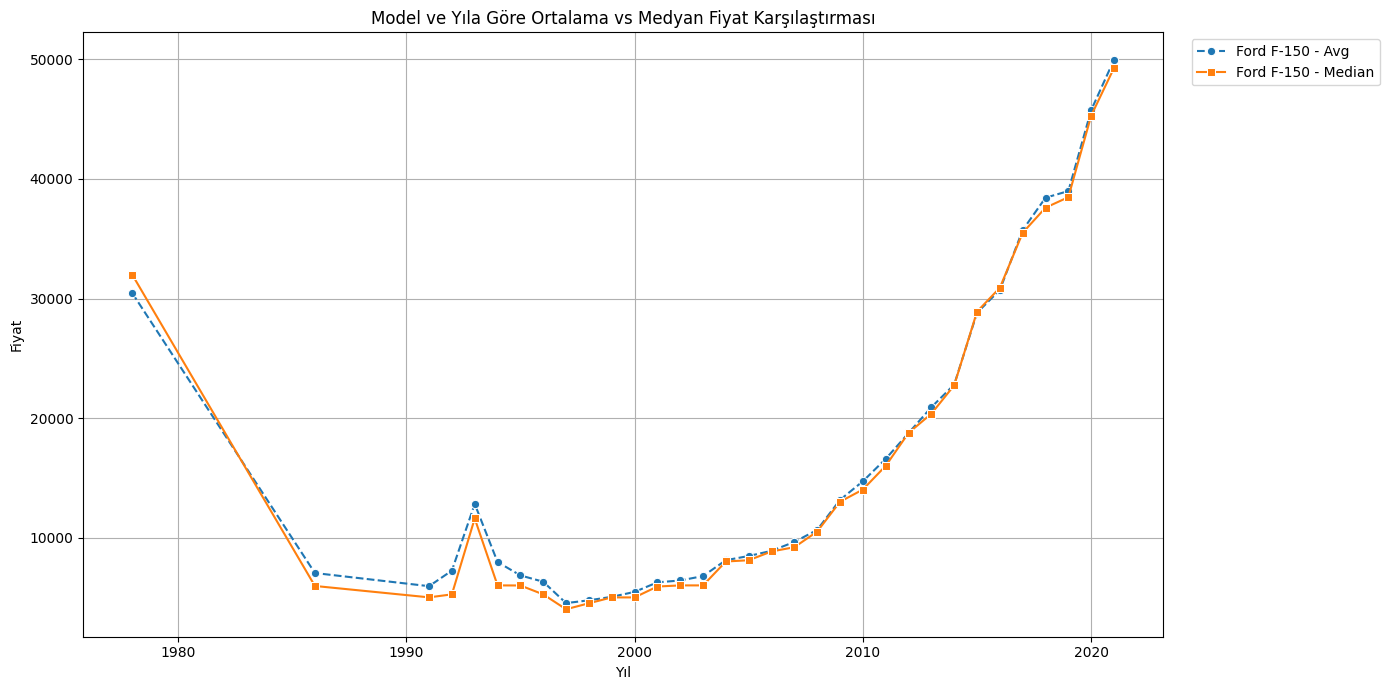

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. make + model_name + year bazlı ortalama ve medyan
model_year_stats = df_filtered_clean.groupby(['make_name', 'model_name', 'year']).agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    count=('price', 'count')
).reset_index()

# 2. Yeterli verisi olmayanları çıkar (örneğin en az 5 ilan)
model_year_stats = model_year_stats[model_year_stats['count'] >= 5]

# 3. make_model sütunu oluştur
model_year_stats['make_model'] = model_year_stats['make_name'] + ' ' + model_year_stats['model_name']

# 4. En çok geçen 3 model_name seçelim
top_models = df_filtered_clean['model_name'].value_counts().head(1).index.tolist()

# 5. Bu modelleri filtrele
selected_models = model_year_stats[model_year_stats['model_name'].isin(top_models)]

# 6. Grafik – Avg vs Median
plt.figure(figsize=(14, 7))

for model in selected_models['make_model'].unique():
    data = selected_models[selected_models['make_model'] == model]
    sns.lineplot(data=data, x='year', y='average_price', label=f'{model} - Avg', linestyle='--', marker='o')
    sns.lineplot(data=data, x='year', y='median_price', label=f'{model} - Median', linestyle='-', marker='s')

plt.title('Model ve Yıla Göre Ortalama vs Medyan Fiyat Karşılaştırması')
plt.xlabel('Yıl')
plt.ylabel('Fiyat')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()


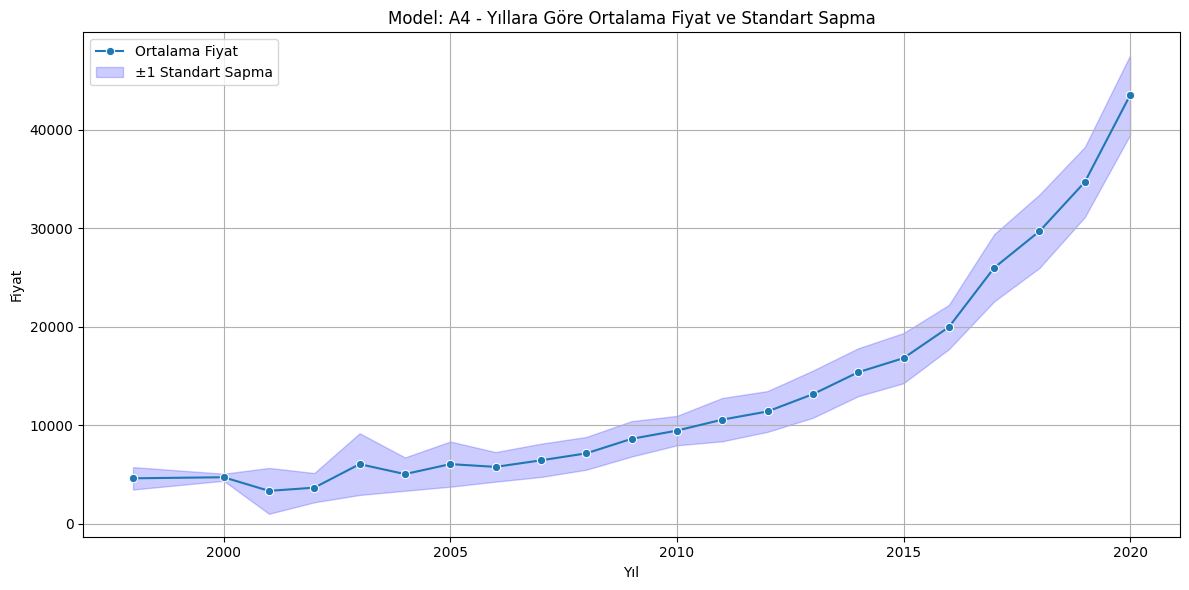

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 'A4' modelini filtrele
model_name = 'A4'
a4_data = df_filtered_clean[df_filtered_clean['model_name'] == model_name]

# 2. Yıla göre ortalama ve std hesapla
stats = a4_data.groupby('year')['price'].agg(['mean', 'std']).reset_index()

# 3. Grafik çiz
plt.figure(figsize=(12, 6))

# Ortalama fiyat çizgisi
sns.lineplot(data=stats, x='year', y='mean', marker='o', label='Ortalama Fiyat')

# Ortalama +/- 1 std bandı (gölge olarak)
plt.fill_between(stats['year'], 
                 stats['mean'] - stats['std'], 
                 stats['mean'] + stats['std'], 
                 color='blue', alpha=0.2, label='±1 Standart Sapma')

plt.title(f"Model: {model_name} - Yıllara Göre Ortalama Fiyat ve Standart Sapma")
plt.xlabel('Yıl')
plt.ylabel('Fiyat')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


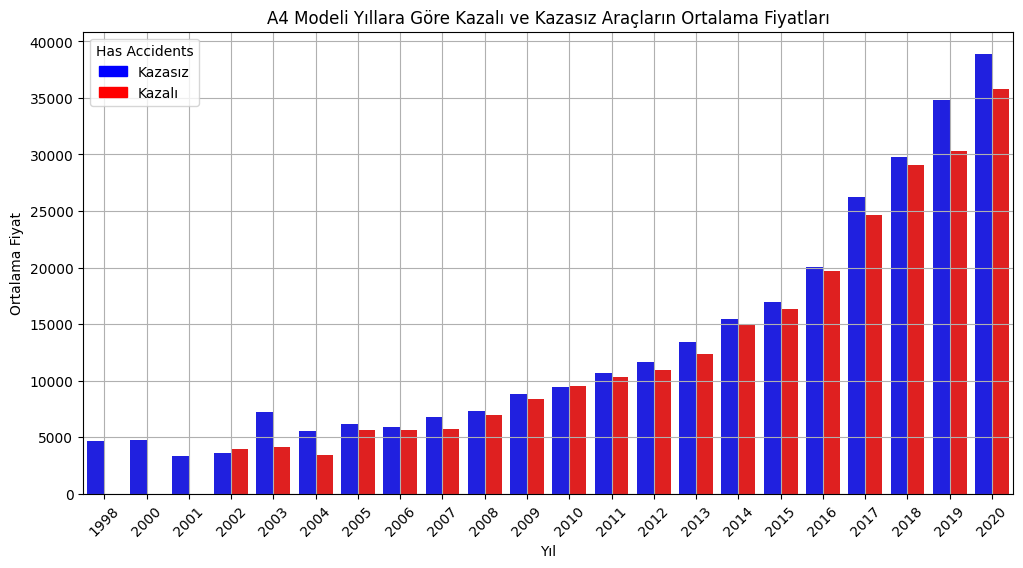

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

model_name = 'A4'
data = df_filtered_clean[df_filtered_clean['model_name'] == model_name]

# Yıla ve kazalı/kazasız durumuna göre ortalama fiyat
avg_price = data.groupby(['year', 'has_accidents'])['price'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=avg_price, x='year', y='price', hue='has_accidents', palette=['blue', 'red'])

plt.title(f"{model_name} Modeli Yıllara Göre Kazalı ve Kazasız Araçların Ortalama Fiyatları")
plt.xlabel("Yıl")
plt.ylabel("Ortalama Fiyat")
kazasiz_patch = mpatches.Patch(color='blue', label='Kazasız')
kazali_patch = mpatches.Patch(color='red', label='Kazalı')

plt.legend(handles=[kazasiz_patch, kazali_patch], title='Has Accidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
